**Question 8: Which 10 countries have the highest booster doses per 100?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
vacc_df = pd.read_csv('../../dataset/Vaccination-data.csv',index_col=False)

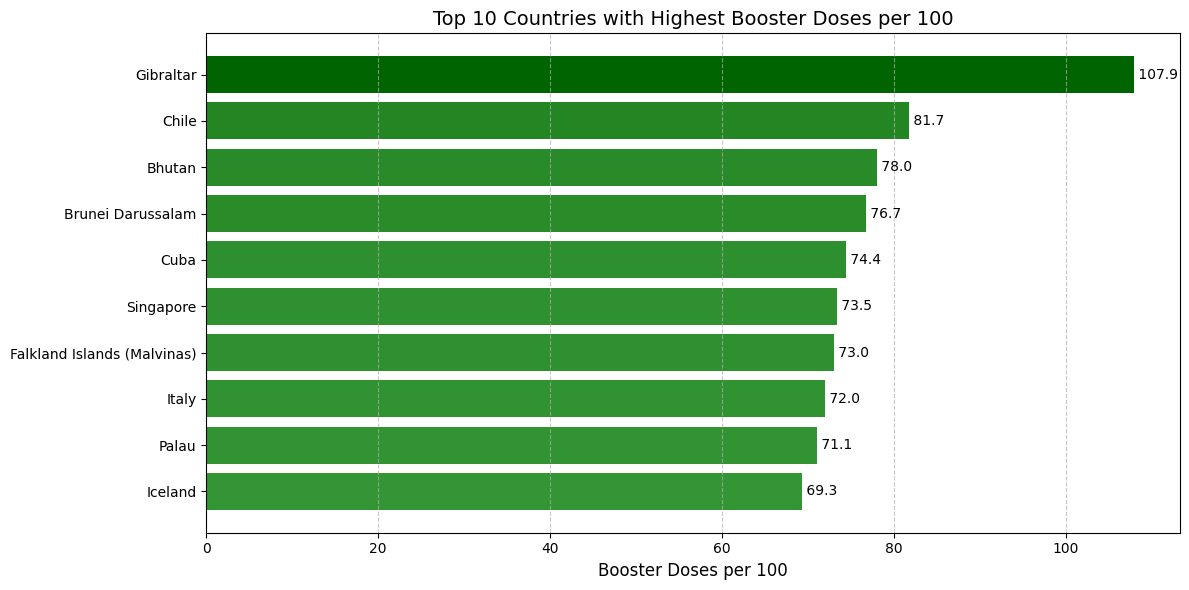

In [3]:
# Select the top 10 countries with the highest booster doses per 100 people
top10 = (
    vacc_df.dropna(subset=['PERSONS_BOOSTER_ADD_DOSE_PER100'])  # Remove missing values
    .sort_values('PERSONS_BOOSTER_ADD_DOSE_PER100', ascending=False)
    .head(10)  # Keep only the top 10
)

# Creating the green color gradient for the bars
cmap = LinearSegmentedColormap.from_list("green_gradient", ["lightgreen", "darkgreen"])
colors = cmap(top10['PERSONS_BOOSTER_ADD_DOSE_PER100'] / top10['PERSONS_BOOSTER_ADD_DOSE_PER100'].max())

# Plotting the top 10 countries
plt.figure(figsize=(12, 6))
bars = plt.barh(top10['COUNTRY'], top10['PERSONS_BOOSTER_ADD_DOSE_PER100'], color=colors)
plt.xlabel('Booster Doses per 100', fontsize=12)
plt.title('Top 10 Countries with Highest Booster Doses per 100', fontsize=14)

# Flip y-axis so the country with highest booster doses appears at the top
plt.gca().invert_yaxis()

# Add grid and annotate each bar with its value
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width():.1f}', va='center', ha='left', fontsize=10)

# Showing the plot
plt.tight_layout()
plt.savefig('Top 10 Countries with Highest Booster Doses per 100.png')
plt.show()
plt.close()

In [4]:
from matplotlib.colors import LinearSegmentedColormap
import squarify
import matplotlib.pyplot as plt

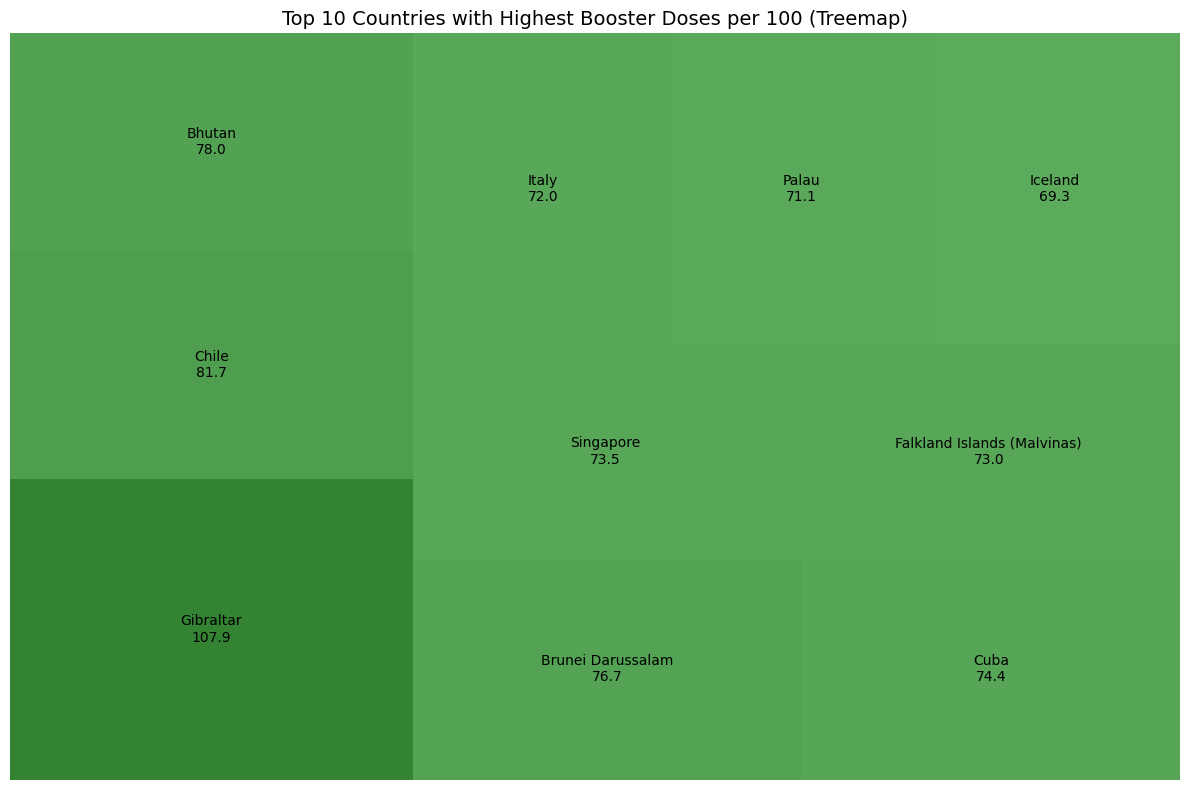

In [5]:
# take top 10 countries by booster doses per 100 people
top10 = (
    vacc_df.dropna(subset=['PERSONS_BOOSTER_ADD_DOSE_PER100'])
           .sort_values('PERSONS_BOOSTER_ADD_DOSE_PER100', ascending=False)
           .head(10)
)

# green gradient scaled by booster dose values
cmap = LinearSegmentedColormap.from_list("green_gradient", ["lightgreen", "darkgreen"])
colors = cmap(top10['PERSONS_BOOSTER_ADD_DOSE_PER100'] / top10['PERSONS_BOOSTER_ADD_DOSE_PER100'].max())

# country vs booster doses per 100 people
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=top10['PERSONS_BOOSTER_ADD_DOSE_PER100'],
    label=[f"{c}\n{val:.1f}" for c, val in zip(top10['COUNTRY'], top10['PERSONS_BOOSTER_ADD_DOSE_PER100'])],
    color=colors,
    alpha=0.8
)
plt.axis('off')
plt.title('Top 10 Countries with Highest Booster Doses per 100 (Treemap)', fontsize=14)
plt.tight_layout()

# Save & show 
plt.savefig('alt_plot8.png')
plt.show()
plt.close()
